In [11]:
# Import the fashion mnist (fmnist) dataset
# and all dependencies
import tensorflow as tf
import tensorflow.keras as keras               # Labels
from tensorflow.keras.models import Sequential # Instantiate model, groups a
                                               # linear stack of layers into Model
from tensorflow.keras.layers import Dense, Dropout # Build/add layers
from matplotlib import pyplot as plt               # Data visualization
fmnist = tf.keras.datasets.fashion_mnist

In [12]:
# Split the fmnist dataset into a {training-set} and {validation-set}
(x_train, y_train), (x_valid, y_valid) = fmnist.load_data()

Restructure the pixel data

In [13]:
# Each image (60000) made into a single pointer-like vector (28x28 = 784)
# Before, it was a 3-channel datatype, now it's just rows and cols
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

# Normalize the data (0-255 => 0-1)
x_train = x_train / 255
x_valid = x_valid / 255

Categorize (label) the data using Keras. The 10 categories are:

1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot



In [14]:
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

# First you must make model (Sequence), then you must Dense
fmnist_model = Sequential()

Adding layers to the neural network requires finesse. Which I don't have. So I'm just going to guess that since it's a bunch of clothes, I'll add a layer for each type of feature I'm going for.

In [15]:
fmnist_model.add(Dense(units=512, activation='sigmoid', input_shape=(784,))) # Input layer
fmnist_model.add(Dense(units = 512, activation='sigmoid')) # First hidden layer
fmnist_model.add(Dense(units = 512, activation='sigmoid')) # Second hidden layer
fmnist_model.add(Dense(units = 10, activation='softmax')) # Output layer, multiclass
                                                          # 10; For each item of clothing

Compile model and add a Loss Function

In [16]:
fmnist_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

Train the model with: **50 Epochs** and a batch (data partition) size of **1200**

In [17]:
history = fmnist_model.fit(
    x_train, y_train, epochs=20, verbose=1,
    validation_data=(x_valid, y_valid), batch_size = 50
    #                                   60000 / 50 = 1200
)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6014 - loss: 1.0491 - val_accuracy: 0.7967 - val_loss: 0.5712
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8297 - loss: 0.4691 - val_accuracy: 0.8369 - val_loss: 0.4548
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8509 - loss: 0.4046 - val_accuracy: 0.8447 - val_loss: 0.4237
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8640 - loss: 0.3726 - val_accuracy: 0.8495 - val_loss: 0.4061
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8748 - loss: 0.3416 - val_accuracy: 0.8599 - val_loss: 0.3837
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8775 - loss: 0.3283 - val_accuracy: 0.8669 - val_loss: 0.3652
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8826 - loss: 0.3152 - val_accuracy: 0.8670 - val_loss: 0.3756
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8872 - loss: 0.3066 - 

Model Summary and Performance Visualizaiton

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,864,726 (7.11 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 932,364 (3.56 MB)

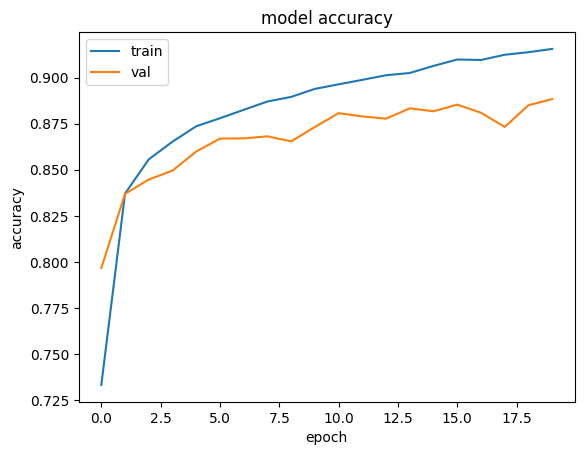

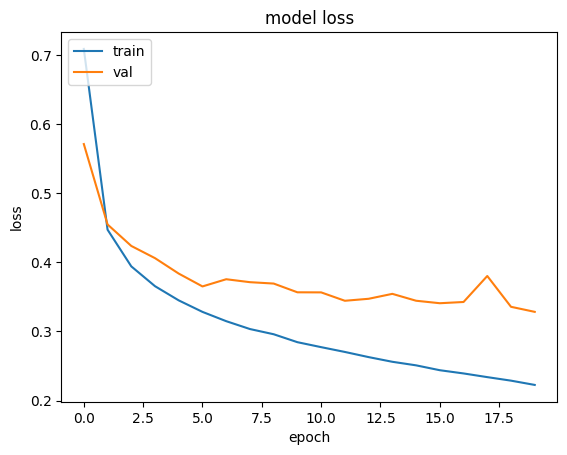

In [18]:
fmnist_model.summary()

# Plot the model's accuracy performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Plot model's loss performance
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Cleanup and shutdown

In [19]:
# import IPython
# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)